In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
matplotlib.rc("font", family = "Malgun Gothic")

In [2]:
pd.options.display.max_rows=8000
pd.options.display.max_columns=999

In [3]:
df_raw = pd.read_csv(r"C:\Users\JHCho\Desktop\카드 데이터\Card_Spanding_cl3.csv", engine="python", encoding='utf-8-sig')
df_raw.head()

,사용일자,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드
0,20180401,노원구,상계2동,종로구 상계2동,자동차정비,여성,42,4,3,56,18.66666667,82,public,0
1,20180401,종로구,혜화동,종로구 혜화동,유통업,여성,43,4,2,50,25,61,travel,0
2,20180401,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,5,2,59,29.5,140,shopping,1
3,20180401,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,4,3,56,18.66666667,104,life,1
4,20180401,노원구,중계4동,종로구 중계4동,음료식품,여성,38,3,2,57,28.5,103,life,1


# 연령별 신용카드/ 체크카드 사용금액

In [47]:
#연령별 신용카드 사용금액
df_credit = df_raw[df_raw["신용카드"] ==1]
df_credit_age = df_credit.groupby(["age_group"])["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False).head(10)
df_credit_age1 = df_credit_age.set_index("age_group")
df_credit_age1

,사용금액
age_group,
4,74416532
3,60552959
5,57755888
6,34709966
2,24394045
7,784619
8,460320
9,149161


Text(0, 0.5, '사용금액')

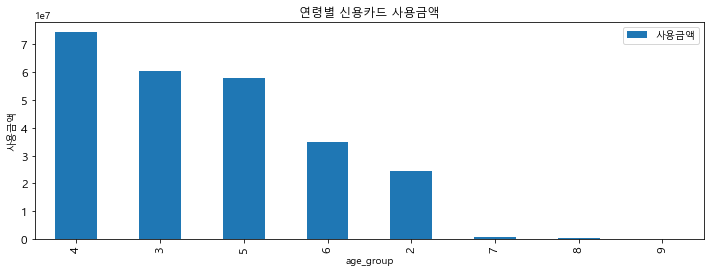

In [50]:
ax = df_credit_age1.plot(kind='bar', title='연령별 신용카드 사용금액', figsize=(12, 4), legend=True, fontsize=12)
# ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('사용금액', fontsize=10)     # y축 정보 표시
# ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정

### 체크카드 df_check

In [4]:
df_check = df_raw[df_raw["신용카드"] ==0]
df_check.head()

,사용일자,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드
0,20180401,노원구,상계2동,종로구 상계2동,자동차정비,여성,42,4,3,56,18.66666667,82,public,0
1,20180401,종로구,혜화동,종로구 혜화동,유통업,여성,43,4,2,50,25,61,travel,0
8,20180401,종로구,창신2동,종로구 창신2동,수리서비스,남성,37,3,4,58,14.5,19,shopping,0
19,20180401,종로구,삼청동,종로구 삼청동,서적문구,여성,46,4,2,56,28,77,public,0
20,20180401,노원구,상계8동,노원구 상계8동,서적문구,여성,48,4,2,58,29,36,food,0


In [51]:
# 연령별 체크카드 사용금액
df_check_age = df_check.groupby(["age_group"])["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False).head(10)
df_check_age1 = df_check_age.set_index("age_group")
df_check_age1

,사용금액
age_group,
2,29704605
4,10473988
5,10059764
6,8873182
3,6881704
7,16692
8,6924
9,2252


Text(0, 0.5, '사용금액')

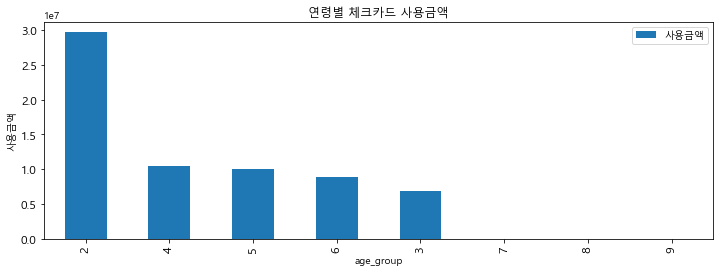

In [52]:
ax = df_check_age1.plot(kind='bar', title='연령별 체크카드 사용금액', figsize=(12, 4), legend=True, fontsize=12)
# ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('사용금액', fontsize=10)     # y축 정보 표시
# ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정

In [55]:
df_check_age

,age_group,사용금액
0,2,29704605
2,4,10473988
3,5,10059764
4,6,8873182
1,3,6881704
5,7,16692
6,8,6924
7,9,2252


In [57]:
df_credit_age

,age_group,사용금액
2,4,74416532
1,3,60552959
3,5,57755888
4,6,34709966
0,2,24394045
5,7,784619
6,8,460320
7,9,149161


In [63]:
card_merge = pd.merge(df_credit_age,df_check_age, on="age_group")
card_merge.rename(columns={"사용금액_x":"신용카드"}, inplace = True) 
card_merge.rename(columns={"사용금액_y":"체크카드"}, inplace = True)
card_merge1 = card_merge.set_index("age_group")
card_merge1

,신용카드,체크카드
age_group,,
4,74416532,10473988
3,60552959,6881704
5,57755888,10059764
6,34709966,8873182
2,24394045,29704605
7,784619,16692
8,460320,6924
9,149161,2252


Text(0, 0.5, '사용금액')

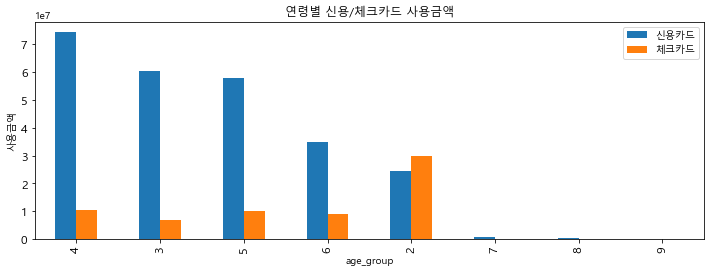

In [64]:
ax = card_merge1.plot(kind='bar', title='연령별 신용/체크카드 사용금액', figsize=(12, 4), legend=True, fontsize=12)
# ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('사용금액', fontsize=10)     # y축 정보 표시
# ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정

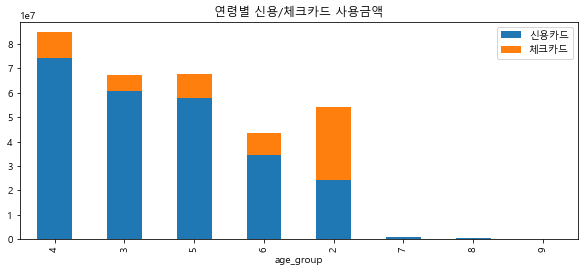

In [75]:
card_merge1.plot.bar(stacked=True, figsize=(10, 4),  title='연령별 신용/체크카드 사용금액')

# 20대 초반, 중반, 후반 신용카드 체크카드 사용금액

In [102]:
def get_category(age):
    cat = ''
    if age<24: cat = 'early twenty'
    elif age<27: cat = 'mid twenty'
    else : cat = 'late twenty'
    
    return cat

In [103]:
# 20대 체크카드 사용금액
df_twenty = df_check[df_check["age_group"]==2]
df_twenty["group"] = df_twenty["연령"].apply(lambda x : get_category(x)) 
df_twenty.head()

C:\Users\JHCho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,사용일자,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드,group
36,20180401,노원구,하계1동,종로구 하계1동,의료기관,여성,26,2,42,179,4.261904762,50,culture,0,mid twenty
48,20180401,종로구,사직동,노원구 사직동,의료기관,남성,29,2,17,98,5.764705882,51,culture,0,late twenty
55,20180401,노원구,상계8동,종로구 상계8동,의료기관,여성,24,2,10,86,8.6,50,culture,0,mid twenty
64,20180401,종로구,창신2동,노원구 창신2동,연료판매,남성,24,2,25,86,3.44,28,onlineShopping,0,mid twenty
77,20180401,종로구,창신2동,노원구 창신2동,의료기관,여성,22,2,10,193,19.3,87,life,0,early twenty


In [104]:
# 20대 체크카드 사용금액
df_check_group = df_twenty.groupby(["group"])["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False).head(10)
df_check_group1 = df_check_group.set_index("group")
df_check_group1

,사용금액
group,
mid twenty,18687086
early twenty,10872428
late twenty,145091


In [105]:
# 20대 신용카드 사용금액
df_twenty_df_credit = df_credit[df_credit["age_group"]==2]
df_twenty_df_credit["group"] = df_twenty_df_credit["연령"].apply(lambda x : get_category(x)) 
df_twenty_df_credit.head()

C:\Users\JHCho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,사용일자,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드,group
26,20180401,종로구,청운효자동,종로구 청운효자동,보건위생,여성,22,2,3,56,18.66666667,155,onlineShopping,1,early twenty
32,20180401,노원구,상계2동,노원구 상계2동,유통업,여성,25,2,46,133,2.891304348,218,comm,1,mid twenty
34,20180401,노원구,상계2동,노원구 상계2동,의료기관,남성,26,2,53,198,3.735849057,100,life,1,mid twenty
47,20180401,노원구,"중계2,3동","노원구 중계2,3동",의복,남성,28,2,35,191,5.457142857,139,shopping,1,late twenty
117,20180401,노원구,상계5동,종로구 상계5동,보건위생,여성,29,2,18,141,7.833333333,107,life,1,late twenty


In [106]:
# 20대 신용카드 사용금액
df_check_group_credit = df_twenty_df_credit.groupby(["group"])["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False).head(10)
df_check_group_credit1 = df_check_group_credit.set_index("group")
df_check_group_credit1

,사용금액
group,
mid twenty,14795939
early twenty,9337304
late twenty,260802


In [107]:
card_merge_age = pd.merge(df_check_group1,df_check_group_credit1, on="group")
card_merge_age

,사용금액_x,사용금액_y
group,,
mid twenty,18687086,14795939
early twenty,10872428,9337304
late twenty,145091,260802


In [109]:
card_merge_age = pd.merge(df_check_group1,df_check_group_credit1, on="group")
card_merge_age.rename(columns={"사용금액_x":"체크카드"}, inplace = True) 
card_merge_age.rename(columns={"사용금액_y":"신용카드"}, inplace = True)
card_merge_age

,체크카드,신용카드
group,,
mid twenty,18687086,14795939
early twenty,10872428,9337304
late twenty,145091,260802


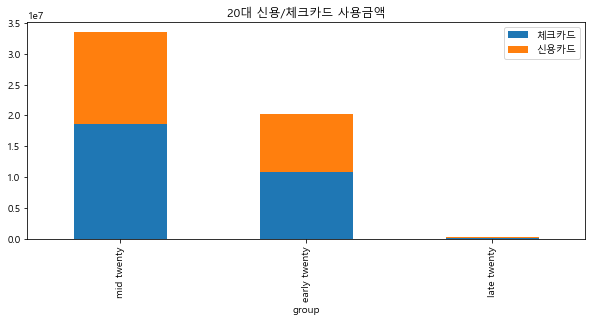

In [110]:
card_merge_age.plot.bar(stacked=True, figsize=(10, 4),  title='20대 신용/체크카드 사용금액')

### 20대 나이별 카드 사용량

In [111]:
n_age_card = df_twenty.groupby("연령")["사용금액"].sum().reset_index()
n_age_card

,연령,사용금액
0,20,10735429
1,21,45265
2,22,41202
3,23,50532
4,24,50950
5,25,18585468
6,26,50668
7,27,54303
8,28,50754
9,29,40034


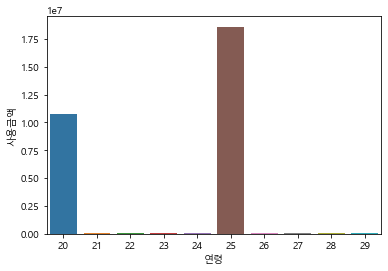

In [113]:
sns.barplot(data=n_age_card, x='연령', y='사용금액')

### 사용횟수 기준 상위 10개 카드

In [5]:
df_check.groupby(["사용카드"])["사용횟수"].sum().reset_index().sort_values(by='사용횟수',ascending=False).head(10)

,사용카드,사용횟수
37,37,445486
36,36,445086
35,35,436279
34,34,393686
16,16,58506
8,8,55322
2,2,53479
0,0,52502
1,1,52496
13,13,51579


### 사용금액 기준 상위 10개 카드

In [6]:
df_check.groupby(["사용카드"])["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False).head(10)

,사용카드,사용금액
37,37,6758308
36,36,6553469
35,35,6479019
34,34,5640086
8,8,2612388
2,2,2348978
1,1,2334495
0,0,2213589
5,5,2207933
3,3,2151771


# 20대는 무슨 업종에서 체크카드를 많이 사용 하나?

In [7]:
twenty = df_check[df_check["age_group"]==2]
twenty_a = twenty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
twenty_a2 = twenty_a.set_index("소비처업종")
twenty_a2

,사용금액
소비처업종,
요식업소,25521486
의료기관,1868942
음료식품,1080110
연료판매,608356
문화취미,575515
보건위생,27765
서적문구,10252
신변잡화,2961
유통업,2855


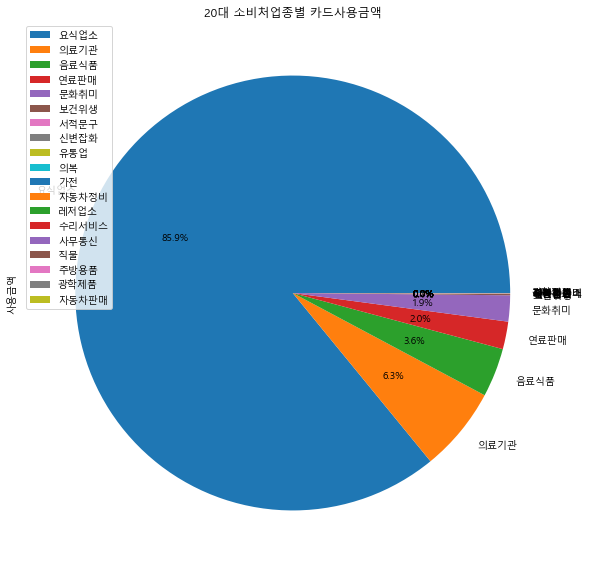

In [8]:
twenty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%', title='20대 소비처업종별 카드사용금액')

# 30대는 무슨 업종에서 체크카드를 많이 사용 하나?

In [12]:
#사용횟수 기준
thirty = df_check[df_check["age_group"]==3]
thirty_a = thirty.groupby("소비처업종")["사용횟수"].sum().reset_index().sort_values(by='사용횟수',ascending=False)
thirty_a

,소비처업종,사용횟수
13,음료식품,164544
14,의료기관,130388
10,연료판매,23831
7,서적문구,4731
11,요식업소,2713
5,보건위생,1723
9,신변잡화,459
12,유통업,351
4,문화취미,217
15,의복,141


In [76]:
thirty = df_check[df_check["age_group"]==3]
thirty_a = thirty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
thirty_a2 = thirty_a.set_index("소비처업종")
thirty_a2.head()

,사용금액
소비처업종,
의료기관,4335746
음료식품,1582006
연료판매,740345
서적문구,109923
요식업소,54954


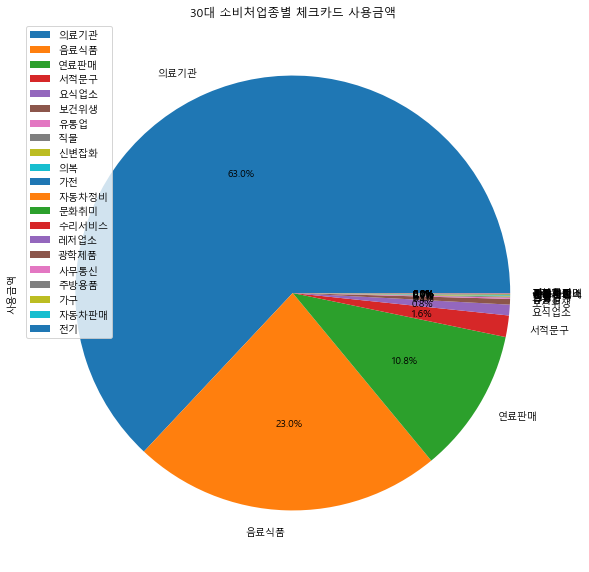

In [77]:
thirty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%',  title='30대 소비처업종별 체크카드 사용금액')

# 40대 소비처업종별 체크카드 사용금액

In [78]:
forty = df_check[df_check["age_group"]==4]
forty_a = forty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
forty_a2 = forty_a.set_index("소비처업종")
forty_a2.head()

,사용금액
소비처업종,
의료기관,7888160
음료식품,2060726
연료판매,437368
보건위생,20848
신변잡화,17169


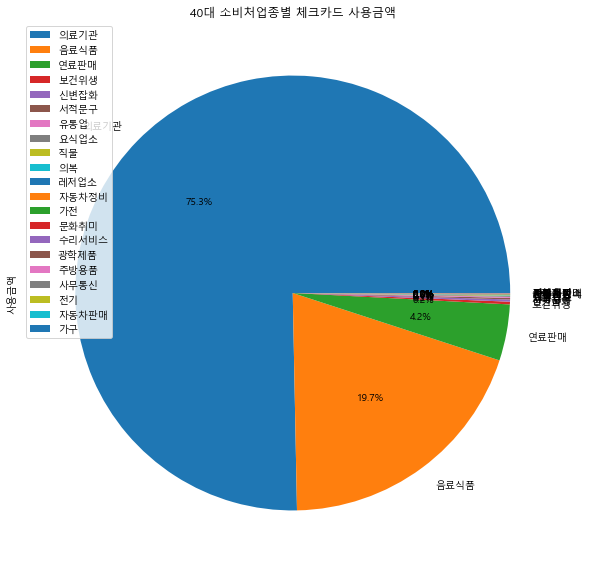

In [79]:
forty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%',  title='40대 소비처업종별 체크카드 사용금액')

# 50대 소비처업종별 체크카드 사용금액

In [80]:
fifty = df_check[df_check["age_group"]==5]
fifty_a = fifty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
fifty_a2 = fifty_a.set_index("소비처업종")
fifty_a2.head()

,사용금액
소비처업종,
의료기관,7553504
음료식품,1848012
연료판매,575901
신변잡화,27482
보건위생,17961


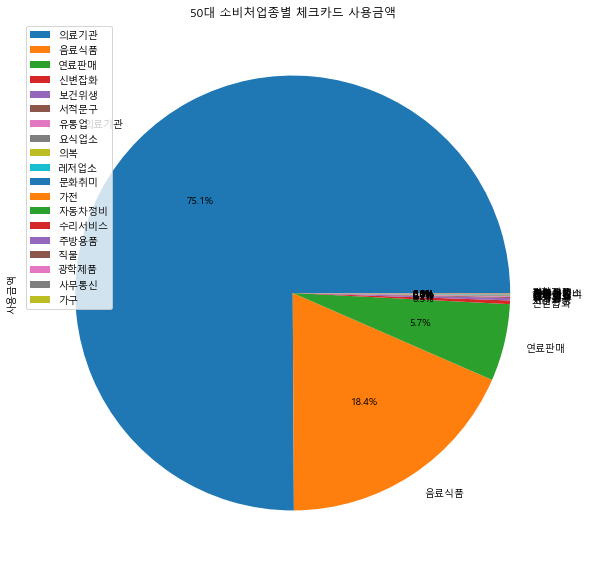

In [81]:
fifty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%',  title='50대 소비처업종별 체크카드 사용금액')

# 60대 소비처업종별 체크카드 사용금액

In [82]:
sixty = df_check[df_check["age_group"]==6]
sixty_a = sixty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
sixty_a2 = sixty_a.set_index("소비처업종")
sixty_a2.head()

,사용금액
소비처업종,
의료기관,6431746
음료식품,1570986
연료판매,811068
직물,15598
보건위생,9937


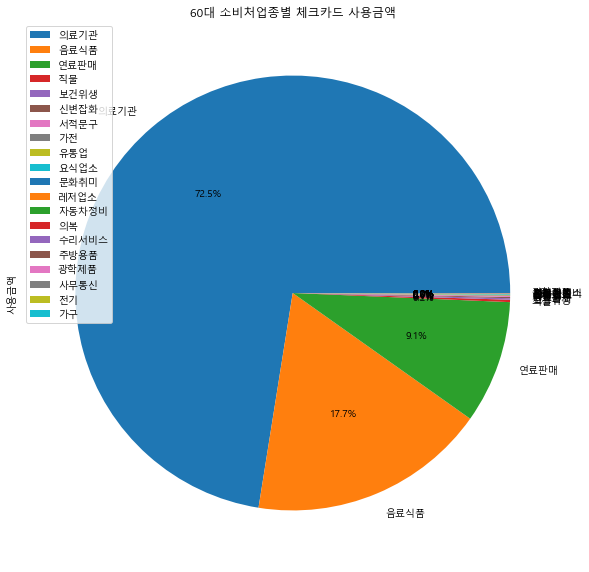

In [83]:
sixty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%',  title='60대 소비처업종별 체크카드 사용금액')

### 20대초 (20세~23세) 소비처 업종별 신용카드 사용금액

In [29]:
twenty = df_check[df_check["연령"]<24]
twenty_a = twenty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
twenty_a2 = twenty_a.set_index("소비처업종")
twenty_a2

,사용금액
소비처업종,
요식업소,9500580
의료기관,582424
음료식품,428391
문화취미,272806
연료판매,72224
보건위생,6881
서적문구,4935
신변잡화,2109
유통업,666


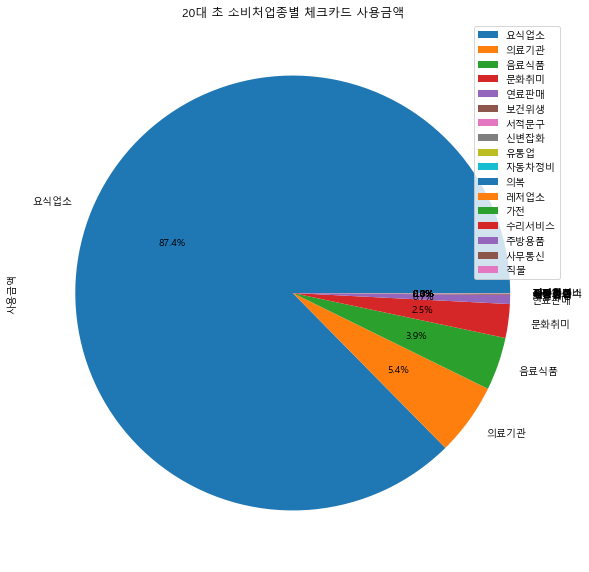

In [30]:
twenty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%', title='20대 초 소비처업종별 체크카드 사용금액')

### 20대 중반 (24세~26세) 소비처 업종별 신용카드 사용금액

In [27]:
twenty = df_check[(df_check["연령"]>23) & (df_check["연령"]<27)]
twenty_a = twenty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
twenty_a2 = twenty_a.set_index("소비처업종")
twenty_a2

,사용금액
소비처업종,
요식업소,15989147
의료기관,1247508
음료식품,604748
연료판매,522014
문화취미,297542
보건위생,18447
서적문구,4107
유통업,1058
가전,867


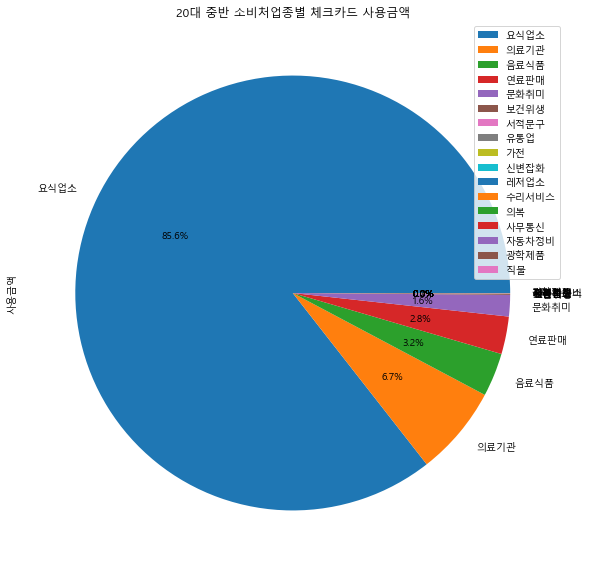

In [28]:
twenty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%', title='20대 중반 소비처업종별 체크카드 사용금액')

### 20대 후반 (27세~29세) 소비처 업종별 신용카드 사용금액

In [23]:
twenty = df_check[(df_check["연령"]>26) & (df_check["연령"]<30)]
twenty_a = twenty.groupby("소비처업종")["사용금액"].sum().reset_index().sort_values(by='사용금액',ascending=False)
twenty_a2 = twenty_a.set_index("소비처업종")
twenty_a2

,사용금액
소비처업종,
음료식품,46971
의료기관,39010
요식업소,31759
연료판매,14118
문화취미,5167
보건위생,2437
서적문구,1210
유통업,1131
의복,735


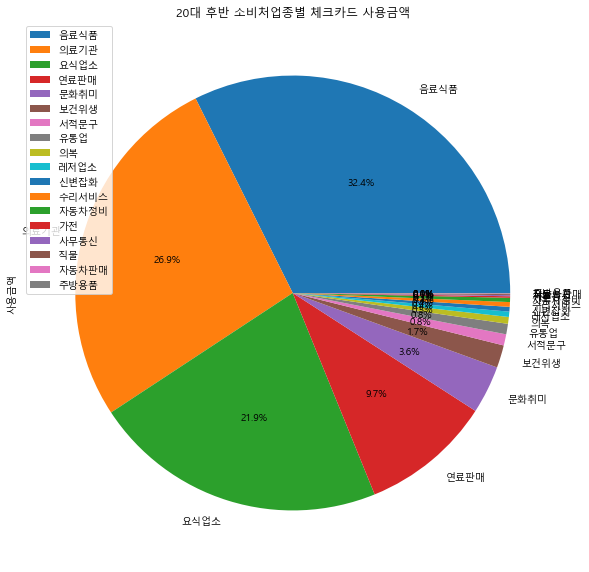

In [24]:
twenty_a2.plot.pie(y='사용금액', figsize=(10, 10),autopct='%1.1f%%', title='20대 후반 소비처업종별 체크카드 사용금액')